# Questão 3 - Clusterização com K-Means
Considere os dados apresentados na tabela abaixo. Determine os centroides dos aglome-
rados "clusters" presentes nos dados, fazendo uso do algoritmo da rede competitiva que
corresponde ao algoritmo K-means. Para tanto considere os itens **(a)** - **(c)** referentes ao processo de inicialização.
<center>

Amostra   | $X_1$ | $X_2$ | $X_3$
:--------:|:-------:|:-------:|:------:
1         |-7.82  |-4.58  |-3.97
2         |-6.68  |3.16   |2.71
3         |4.36   |-2.19  |2.09
4         |6.72   |0.88   |2.80
5         |-8.64  |3.06   |3.50
6         |-6.87  |0.57   |-5.45
7         |4.47   |-2.62  |5.76
8         |6.73   |-2.01  |4.18
9         |-7.71  |2.34   |-6.33
10        |-6.91  |-0.49  |-5.68
11        |6.18   |2.81   |5.82
12        |6.72   |-0.93  |-4.04
13        |-6.25  |-0.26  |0.56
14        |-6.94  |-1.22  |1.13
15        |8.09   |0.20   |2.25
16        |6.81   |0.17   |-4.15
17        |-5.19  |4.24   |4.04
18        |-6.38  |-1.74  |1.43
19        |4.08   |1.30   |5.33
20        |6.27   |0.93   |-2.78
</center>

## Passando os dados para um Pandas DataFrame

In [2]:
x1 = [-7.82, -6.68, 4.36, 6.72, -8.64, -6.87, 4.47, 6.73, -7.71, -6.91, 6.18, 6.72, -6.25, -6.94, 8.09, 6.81, -5.19, -6.38, 4.08, 6.27]
x2 = [-4.58, 3.16, -2.19, 0.88, 3.06, 0.57, -2.62, -2.01, 2.34, -0.49, 2.81, -0.93, -0.26, -1.22, 0.20, 0.17, 4.24, -1.74, 1.30, 0.93]
x3 = [-3.97, 2.71, 2.09, 2.80, 3.50, -5.45, 5.76, 4.18, -6.33, -5.68, 5.82, -4.04, 0.56, 1.13, 2.25, -4.15, 4.04, 1.43, 5.33, -2.78]

In [3]:
import pandas as pd
# Create a DataFrame from the lists
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

## **a)** Considere que existam três clusters e a inicialização dos centros seja aleatória

### Distribuição dos Dados

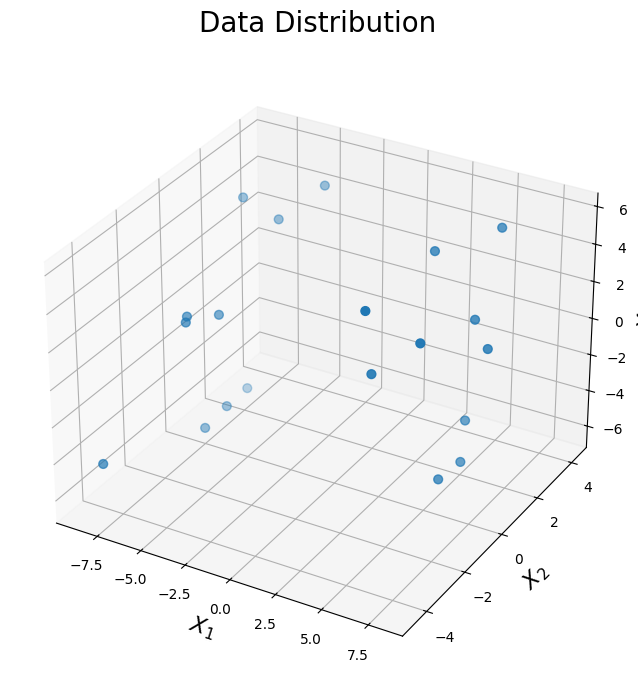

In [6]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df["x1"],df["x2"],df["x3"],s=40)
plt.title('Data Distribution', pad=20, size=20)
ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$X_2$', fontsize=16)
ax.set_zlabel('$X_3$', fontsize=16)
plt.show()

### Inicializando e Treinando Modelo K-Means

In [8]:
from sklearn.cluster import KMeans
# instantiate the model
kmeans = KMeans(init='random', n_clusters=3, random_state=42, max_iter=1000)
# fit the model
kmeans.fit(df)

KMeans(init='random', max_iter=1000, n_clusters=3, random_state=42)

In [9]:
# get number of interations performed until convergence
print(f"Número de iterações realizadas até a convergência: {kmeans.n_iter_}")
# get cluster centers
print(f"Centro 1: {kmeans.cluster_centers_[:, 0]}\nCentro 2: {kmeans.cluster_centers_[:, 1]}\nCentro 3: {kmeans.cluster_centers_[:, 2]}")

Número de iterações realizadas até a convergência: 3
Centro 1: [-7.3275  6.043  -6.68  ]
Centro 2: [-0.54       -0.146       1.20666667]
Centro 3: [-5.3575      1.726       2.22833333]


### Plotando Resultados dos Centroides Encontrados

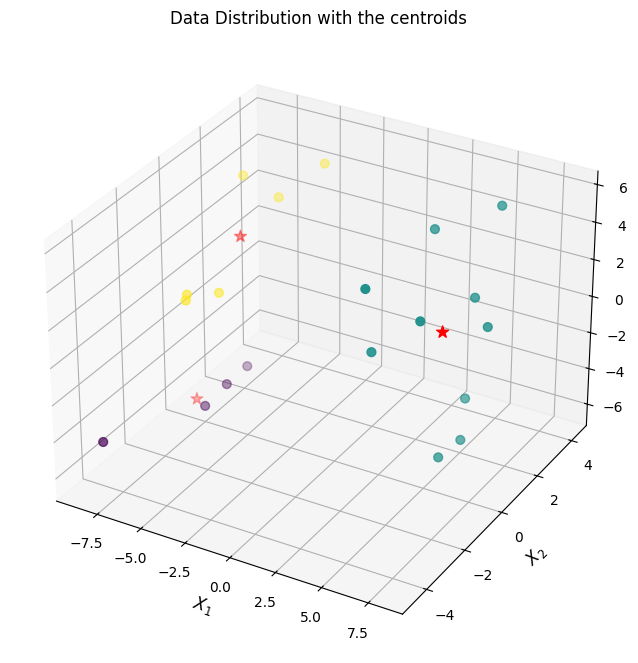

In [25]:
# get the labels
labels = kmeans.labels_

# plot the data hilighting the centroids
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, c=labels, s=40)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=80, marker='*')
plt.title('Data Distribution with the centroids', pad=10, size=12)
ax.set_xlabel('$X_1$', fontsize=12)
ax.set_ylabel('$X_2$', fontsize=12)
ax.set_zlabel('$X_3$', fontsize=12, labelpad=10)
plt.show()

## **b)** Considere que existam três clusters e a inicialização dos centros seja dada por $m_1=(0,0,0)^t, m_2=(1,1,1)^t, m_3=(-1,0,2)^t$.


### definindo a matriz de inicialização dos 3 centros conforme o especificado

In [26]:
import numpy as np
# inicialize the model with the centroids in m1, m2 and m3
m1 = [[0],[0],[0]]
m2 = [[1],[1],[1]]
m3 = [[-1],[0],[2]]

init = np.concatenate((m1, m2, m3), axis=1)
init

array([[ 0,  1, -1],
       [ 0,  1,  0],
       [ 0,  1,  2]])

### Inicializando e Treinando Modelo K-Means

In [27]:
# instantiate the model
kmeans = KMeans(init=init, n_init=3, n_clusters=3, random_state=0, max_iter=1000)

# fit the model
kmeans.fit(df)

/Users/efrainmpp/Documents/Mestrado/Neural-Network-PPGEEC2321/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1404: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=3.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[ 0,  1, -1],
       [ 0,  1,  0],
       [ 0,  1,  2]]),
       max_iter=1000, n_clusters=3, n_init=3, random_state=0)

In [28]:
# get number of interations performed until convergence
print(f"Número de iterações realizadas até a convergência: {kmeans.n_iter_}")
# get cluster centers
print(f"Centro 1: {kmeans.cluster_centers_[:, 0]}\nCentro 2: {kmeans.cluster_centers_[:, 1]}\nCentro 3: {kmeans.cluster_centers_[:, 2]}")

Número de iterações realizadas até a convergência: 3
Centro 1: [-0.28166667 -6.84285714  5.80428571]
Centro 2: [ 0.43166667  0.38       -0.23285714]
Centro 3: [-4.73833333  1.34285714  4.03285714]


### Plotando Resultados dos Centroides Encontrados

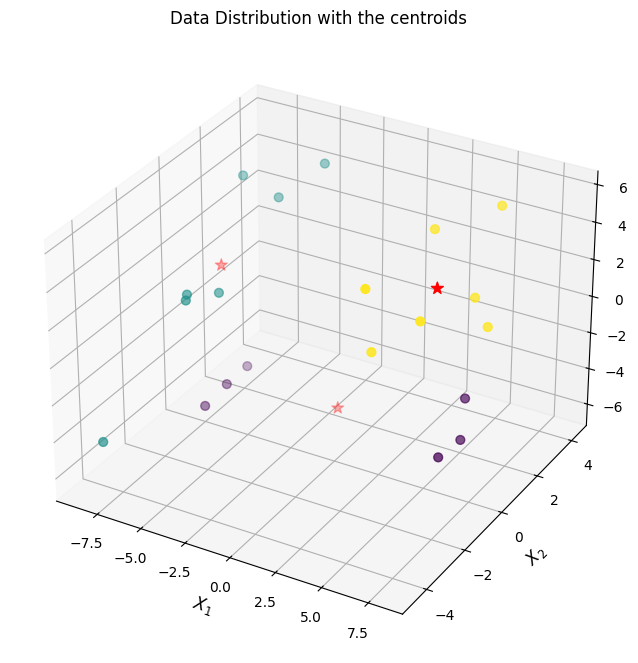

In [29]:
# get the labels
labels = kmeans.labels_

# plot the data hilighting the centroids
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, c=labels, s=40)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=80, marker='*')
plt.title('Data Distribution with the centroids', pad=10, size=12)
ax.set_xlabel('$X_1$', fontsize=12)
ax.set_ylabel('$X_2$', fontsize=12)
ax.set_zlabel('$X_3$', fontsize=12, labelpad=10)
plt.show()

## **c)** Repita o item a considerando que os centros iniciais sejam $m_1=(-0.1,0,0.1)^t, m_2=(0,-0.1,0.1)^t, m_3=(-0.1,-0.1,0.1)^t$. Compare o resultado obtido com o item (a) e explique a razão das diferenças, incluindo o número de interações para alcançar a convergência.

### Definindo a matriz de inicialização dos 3 centros conforme o especificado

In [30]:
# inicialize the model with the centroids in m1, m2 and m3
m1 = [[-0.1],[0],[0.1]]
m2 = [[0],[-0.1],[0.1]]
m3 = [[-0.1],[-0.1],[0.1]]

init = np.concatenate((m1, m2, m3), axis=1)
init

array([[-0.1,  0. , -0.1],
       [ 0. , -0.1, -0.1],
       [ 0.1,  0.1,  0.1]])

### Inicializando e Treinando Modelo K-Means

In [31]:
# instantiate the model
kmeans = KMeans(init=init, n_init=3, n_clusters=3, random_state=0, max_iter=1000)

# fit the model
kmeans.fit(df)

/Users/efrainmpp/Documents/Mestrado/Neural-Network-PPGEEC2321/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1404: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=3.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[-0.1,  0. , -0.1],
       [ 0. , -0.1, -0.1],
       [ 0.1,  0.1,  0.1]]),
       max_iter=1000, n_clusters=3, n_init=3, random_state=0)

In [32]:
# get number of iterations
print(f"Número de iterações realizadas até a convergência: {kmeans.n_iter_}")

# get centroids
print(f"Centro 1: {kmeans.cluster_centers_[:, 0]}\nCentro 2: {kmeans.cluster_centers_[:, 1]}\nCentro 3: {kmeans.cluster_centers_[:, 2]}")

Número de iterações realizadas até a convergência: 3
Centro 1: [-6.939       6.6         5.80428571]
Centro 2: [ 0.508       0.05666667 -0.23285714]
Centro 3: [-0.806      -3.65666667  4.03285714]


### Plotando Resultados dos Centroides Encontrados

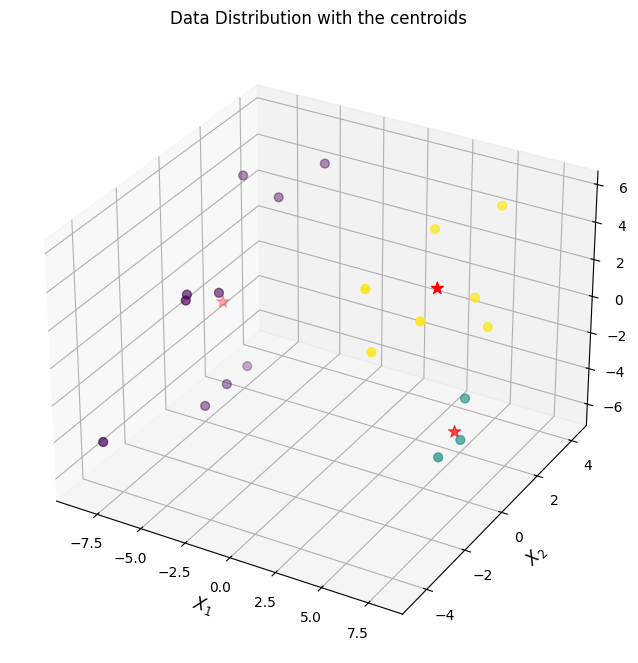

In [33]:
# get the labels
labels = kmeans.labels_

# plot the data hilighting the centroids
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, c=labels, s=40)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=80, marker='*')
plt.title('Data Distribution with the centroids', pad=10, size=12)
ax.set_xlabel('$X_1$', fontsize=12)
ax.set_ylabel('$X_2$', fontsize=12)
ax.set_zlabel('$X_3$', fontsize=12, labelpad=10)
plt.show()

# Conclusão
Observa-se que o algoritmo K-means apresenta alta sensibilidade à escolha dos centróides iniciais. Na primeira execução, foi utilizado o método K-Means++ da biblioteca, que visa maximizar a distância entre os centróides iniciais, aumentando a probabilidade de encontrar uma solução globalmente ótima. Esse método seleciona o primeiro centróide aleatoriamente e os demais com base em uma distribuição proporcional à distância ao centróide mais próximo já escolhido.

Nas execuções subsequentes, com inicializações explícitas dos centróides, foram observadas variações tanto nas posições finais dos centróides quanto no número de iterações necessárias para a convergência (2 iterações na primeira execução e 3 nas demais). Isso evidencia que a inicialização dos centróides pode impactar significativamente o resultado final do algoritmo, podendo levar a diferentes soluções locais e partições distintas dos dados. Portanto, a escolha adequada da estratégia de inicialização é fundamental para a obtenção de resultados mais robustos e consistentes em K-means.